In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("1-studyhours.csv")

In [90]:
df.head(10)

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7
5,18.0,78.8
6,19.2,77.1
7,22.2,90.8
8,25.2,99.0
9,17.4,84.6


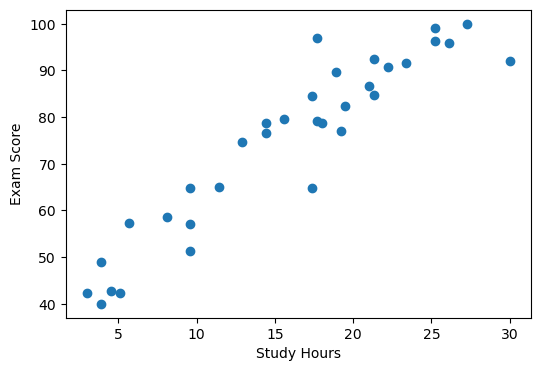

In [91]:
plt.figure(figsize=(6,4))
plt.scatter(df["Study Hours"],df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [92]:
#train-test split
from sklearn.model_selection import train_test_split

In [93]:
X=df[["Study Hours"]]
y=df["Exam Score"]

In [94]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [95]:
y_train

18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

In [96]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [97]:
#standardize the data set !!!!

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [100]:
#daha dengeli öznitelik değerleri için 
#verimli gradient descent   sağlar standartlaştırma

In [101]:
scaler = StandardScaler()

In [102]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #testte sadece transform  data leakage!!

In [103]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [104]:
X_test

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
regression = LinearRegression()

In [107]:
regression.fit(X_train, y_train)

LinearRegression()

In [108]:
print("Coefficent: ", regression.coef_)
print("Intercept :",regression.intercept_)

Coefficent:  [16.17860223]
Intercept : 76.9076923076923


In [109]:
#y = 76,90 + 16.18 x

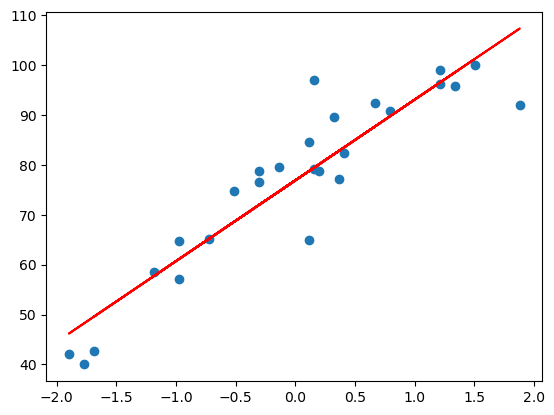

In [110]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train),"r")
plt.show()

In [111]:
regression.predict(scaler.transform([[20]]))  #20 saat çalışan biri 84 alması beklenirmiş

C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [137]:
regression.predict(scaler.transform([[10]]))

C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([62.05187491])

In [139]:
#prediction with test data

In [141]:
y_pred_test = regression.predict(X_test)

In [143]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

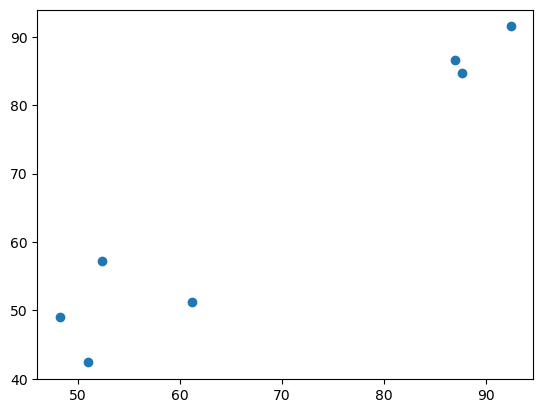

In [145]:
plt.scatter(y_pred_test, y_test)

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [149]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)

mse:  29.45839048833392
mae:  4.054868128856142
rmse:  5.427558427906043


In [151]:
r2 = r2_score(y_test, y_pred_test)

In [153]:
r2

0.9196596206825491